# Importing Packages

In [1]:
import matplotlib.pyplot as plt
from networkx_viewer import Viewer
import matplotlib.colors as mcolors
from collections import defaultdict
import networkx as nx 

#from model import spcall

%matplotlib inline

In [2]:
def draw(G, measures, measure_name):
  #* https://stackoverflow.com/a/52013202
  #* https://aksakalli.github.io/2017/07/17/network-centrality-measures-and-their-visualization.html
  #* https://www.datacamp.com/community/tutorials/social-network-analysis-python

  #* Create two lists of edges based on their weight.
  #* 'elarge' contains edges with weight greater than 5.
  #* 'esmall' contains edges with weight less than or equal to 5.
  elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 5]
  esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 5]

  #* Generate a spring layout for the graph.
  pos = nx.spring_layout(G)

  #* Set the size of each node based on its corresponding measure value.
  node_size = [v * 1000 for v in measures.values()]

  #* Draw the nodes of the graph with their size and color determined by the measure values.
  #* The color map 'plt.cm.plasma' is used for coloring the nodes.
  nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size, 
                                  cmap=plt.cm.plasma,
                                  node_color=list(measures.values()),
                                  nodelist=measures.keys())

  #* Set the color normalization of the nodes to be logarithmic.
  nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
  
  #* Draw the edges of the graph.
  edges = nx.draw_networkx_edges(G, pos)
  
  #* Draw the 'elarge' and 'esmall' edges with different styles.
  #* The 'elarge' edges are drawn with a width of 2.
  #* The 'esmall' edges are drawn with a width of 2, transparency of 0.5, blue color, and dashed style.
  nx.draw_networkx_edges(G, pos, edgelist=elarge, width=2)
  nx.draw_networkx_edges(G, pos, edgelist=esmall, width=2, alpha=0.5, edge_color='blue', style='dashed')

  #* Add labels to the nodes with a font size of 10, blue color, and sans-serif font family.
  nx.draw_networkx_labels(G, pos, font_size=10, font_color='blue', font_family='sans-serif')
  
  #* Set the title of the plot, add a color bar, turn off the axis, and display the plot.
  plt.title(measure_name)
  plt.colorbar(nodes)
  plt.axis('off')
  plt.show()


In [3]:
def plot_G(G, measures):
  #* Define two lists of edges based on their weight.
  #* 'elarge' contains edges with weight greater than 5.
  #* 'esmall' contains edges with weight less than or equal to 5.
  elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 5]
  esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 5]

  #* Generate a spring layout for the graph.
  #* This layout treats edges as springs holding nodes close, while treating nodes as repelling objects.
  pos = nx.spring_layout(G)
  
  #* Set the size of each node based on its corresponding measure value.
  #* The size is multiplied by 1000 for better visibility.
  node_size = [v * 1000 for v in measures.values()]

  #* Draw the nodes of the graph with their size and color determined by the measure values.
  #* The color map 'plt.cm.plasma' is used for coloring the nodes.
  nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size,
                                cmap=plt.cm.plasma,
                                node_color=list(measures.values()),
                                nodelist=measures.keys())

  #* Set the color normalization of the nodes to be logarithmic.
  #* This can be useful if the measure values vary widely.
  nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))

  #* Draw the nodes of the graph again with a fixed size of 50 and a color map of 'plt.cm.plasma'.
  nx.draw_networkx_nodes(G, pos, node_size=50, cmap=plt.cm.plasma)

  #* Draw the 'elarge' and 'esmall' edges with different styles.
  #* The 'elarge' edges are drawn with a width of 2.
  #* The 'esmall' edges are drawn with a width of 2, transparency of 0.5, blue color, and dashed style.
  nx.draw_networkx_edges(G, pos, edgelist=elarge, width=2)
  nx.draw_networkx_edges(G, pos, edgelist=esmall, width=2, alpha=0.5, edge_color='blue', style='dashed')

  #* Add labels to the nodes with a font size of 10, black color, and sans-serif font family.
  nx.draw_networkx_labels(G ,pos, font_size=10, font_color='black', font_family='sans-serif')

  #* Turn off the axis and display the plot.
  plt.axis('off')
  plt.show()

In [4]:
def plot_Gp(G, measures):
  # Set the figure size to make the plot high-definition.
  plt.figure(figsize=(50, 50), dpi=300)

  #* Define two lists of edges based on their weight.
  #* 'elarge' contains edges with weight greater than 5.
  #* 'esmall' contains edges with weight less than or equal to 5.
  elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 5]
  esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 5]

  #* Generate a spring layout for the graph.
  #* This layout treats edges as springs holding nodes close, while treating nodes as repelling objects.
  pos = nx.spring_layout(G, iterations=13, scale=300, seed=1234)

  #* Set the size of each node based on its corresponding measure value.
  #* The size is multiplied by 1000 for better visibility.
  node_size = [v * 1000 for v in measures.values()]

  #* Draw the nodes of the graph with their size and color determined by the measure values.
  #* The color map 'plt.cm.plasma' is used for coloring the nodes.
  nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size, cmap=plt.cm.plasma, 
                                  node_color=list(measures.values()),
                                  nodelist=measures.keys())

  #* Set the color normalization of the nodes to be logarithmic.
  #* This can be useful if the measure values vary widely.
  nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))

  #* Create a color map based on the node labels.
  #* Different labels are mapped to different colors.
  # color_map = []
  # for node in G:
  #   if 'fac' in node:
  #       color_map.append('blue')
  #   elif 'stu' in node:
  #       color_map.append('green')
  #   elif 'adm' in node:
  #       color_map.append('yellow')
  #   elif 'sub' in node:
  #       color_map.append('orange')
  #   elif 'isp' in node:
  #       color_map.append('red')
  #   elif 'bis' in node:
  #       color_map.append('purple')
  #   elif 'par' in node:
  #       color_map.append('black')
  #   elif 'sup' in node:
  #       color_map.append('aqua')
  #   elif node in ['grade', 'assignment', 'Bulletin Board', 're-assign', 'enroll', 'register', 'transfer', 'drop']:
  #       color_map.append('gray')  # white for the specific nodes
  #   else:
  #       print (node)


  # Add the 'color' attribute to the nodes based on the node labels
  color_map = {}
  for node in G.nodes:
      node_str = str(node)
      if 'fac' in node_str:
          color_map[node] = 'blue'
      elif 'stu' in node_str:
          color_map[node] = 'green'
      elif 'adm' in node_str:
          color_map[node] = 'yellow'
      elif 'sub' in node_str:
          color_map[node] = 'orange'
      elif 'isp' in node_str:
          color_map[node] = 'red'
      elif 'bis' in node_str:
          color_map[node] = 'purple'
      elif 'par' in node_str:
          color_map[node] = 'black'
      elif 'sup' in node_str:
          color_map[node] = 'aqua'
      elif node_str in ['assignment', 'attendance', 'Bulletin Board', 'collaborate', 'enroll', 'event', 'grade', 're-assign', 'register', 'like', 'happy', 'surprise', 'sad','angry', 'room_', 'commented']:
          color_map[node] = 'gray'
      else:
          print(node_str)

  #* Draw the nodes of the graph again with a fixed size of 10 and a color map based on the node labels.
  nx.draw_networkx_nodes(G, pos, node_size=10, node_color=color_map, cmap=plt.cm.plasma)

  #* Draw the 'elarge' and 'esmall' edges with different styles.
  #* The 'elarge' edges are drawn with a width of 2 and gray color.
  #* The 'esmall' edges are drawn with a width of 2, transparency of 0.5, gray color, and dashed style.
  nx.draw_networkx_edges(G, pos, edgelist=elarge, edge_color='gray', width=1)
  nx.draw_networkx_edges(G, pos, edgelist=esmall, width=1, alpha=0.5, edge_color='gray', style='dashed')

  #* Add labels to the nodes with a font size of 10, gray color, and sans-serif font family.
  nx.draw_networkx_labels(G, pos, font_size=3, font_color='black', font_family='sans-serif')

  #* Turn off the axis and display the plot.
  plt.axis('off')

  #* Increase the DPI to 300 for a high-quality plot.
  plt.savefig("network.png", dpi=300)
  
  #* Display the plot 
  plt.show()


In [5]:
def plot_G2(G):
  #* Generate a spring layout for the graph.
  pos = nx.spring_layout(G)

  #* Draw the graph using NetworkX's built-in draw function.
  nx.draw_networkx(G)

  #* Add labels to the nodes with a font size of 10, gray color, and sans-serif font family.
  nx.draw_networkx_labels(G, pos, font_size=10, font_color='gray', font_family='sans-serif')

  #* Turn off the axis and display the plot.
  plt.axis('off')
  plt.show()

In [6]:
def writeandrender(filename, centrality):
  #* Extract the measure from the centrality dictionary.
  cmeasure = centrality["measure"]
  
  #* Sort the items in the measure dictionary in descending order based on their values.
  sorted_x = sorted(cmeasure.items(), key=lambda kv: kv[1], reverse=True)

  #* Check the 'overwrite' flag in the centrality dictionary.
  #* If it's True, open the file in write mode, which overwrites the existing content.
  #* If it's False, open the file in append mode, which adds to the existing content.
  if centrality["overwrite"]:
      f = open(filename + centrality["prefix"] + ".txt", 'w')
  else:
      f = open(filename + centrality["prefix"] + ".txt", 'a')
  
  #* Write the sorted items to the file.
  f.write(str(sorted_x))
  
  #* Close the file.
  f.close()

  #* Draw the weighted graph with the measure and the name from the centrality dictionary.
  draw(G, centrality["measure"], centrality["name"])

# Data Cleaning

##### Removing the generic users from the dataset: "7505d64a54e061b7acd54ccd58b49dc43500b635"

In [7]:
import pandas as pd

# Load the data into a pandas DataFrame
df = pd.read_csv('C:/Users/boyma/OneDrive/Desktop/SNA_code/agent_to_tasks/raw_data.csv')

# Print the number of rows before removing
print(f"Number of rows before removing: {len(df)}")

# Remove rows where 'receiverid' is "7505d64a54e061b7acd54ccd58b49dc43500b635"
df = df[df['receiverid'] != "7505d64a54e061b7acd54ccd58b49dc43500b635"]

# Print the number of rows after removing
print(f"Number of rows after removing: {len(df)}")


Number of rows before removing: 49493
Number of rows after removing: 46920


# Data Transformation 
- Transform the data from "reactions" column into their string equivalents in a new column called "emoji"
- Transform the data from "roomid" column into a new column called "room_name". For every new data, append the string "room_" to the beginning of the "roomid". For example, if the "roomid" is "a0dc6db1830d89519e8f", then the new column will be "room_a0dc6db". 
- Add a new column called "commented" where a string "commented" is added when the "commenter" column is not empty, otherwise, leave it as is. 



In [8]:
# Define a mapping from integers to emoji names
reaction_mapping = {
    1: 'like',
    2: 'happy',
    3: 'surprise',
    4: 'sad',
    5: 'angry'
}

# Create a new column 'emoji' by mapping the 'reaction' column to the corresponding emoji names
df['emoji'] = df['reaction'].map(reaction_mapping)

# Create a new column 'room_name' by appending 'room_' to the first 7 characters of the 'roomid' column
df['room_name'] = 'room_' + df['roomid'].str.slice(0, 7)

# Create a new column 'commented' where its data is derived from the 'commenter' column
df['commented'] = df['commenter'].apply(lambda x: 'commented' if pd.notnull(x) else '')


### Export to a new csv file to check whether the transformation is sucessful

In [9]:
# Write the DataFrame to a CSV file
df.to_csv('new_data.csv', index=False)


# Anonymize the users

In [10]:
import hashlib
import pandas as pd

def anonymize_id(id):
    if pd.isnull(id):
        return ''
    prefix = id[0]
    hash_object = hashlib.sha1(id.encode())
    hex_dig = hash_object.hexdigest()
    if prefix == 'A':
        return 'adm' + hex_dig[:5]
    elif prefix == 'F':
        return 'fac' + hex_dig[:5]
    elif prefix == 'S':
        return 'stu' + hex_dig[:5]
    elif prefix == 'P':
        return 'par' + hex_dig[:5]
    else:
        return 'unk' + hex_dig[:5]

# Create a dictionary to store the original IDs and their corresponding anonymized IDs
anonymized_ids = {}

# Get all unique IDs in the 'initiatorid', 'receiverid', 'reactor', and 'commenter' columns
unique_ids = pd.concat([df['initiatorid'], df['receiverid'], df['reactor'], df['commenter']]).dropna().unique()

# Create a mapping from the original IDs to the hashed IDs
for id in unique_ids:
    anonymized_ids[id] = anonymize_id(id)

# Replace the original IDs with the hashed IDs in the 'initiatorid', 'receiverid', 'reactor', and 'commenter' columns
for column in ['initiatorid', 'receiverid', 'reactor', 'commenter']:
    df[column] = df[column].map(anonymized_ids)


### Export to a new csv to check whether the anonymization is successful

In [11]:
# Write the DataFrame to a CSV file
df.to_csv('anon_data.csv', index=False)

## Mapping the Agent to Task Learning Interactions

In [12]:
import networkx as nx

# Create a directed graph
G = nx.Graph()

# Iterate over the rows of the dataframe
for index, row in df.iterrows():
    # Check if the IDs are not empty or null
    if pd.notnull(row['initiatorid']) and pd.notnull(row['receiverid']):
        # For Timeline Interactions
        G.add_edge(row['initiatorid'], row['tltype'])
        G.add_edge(row['tltype'], row['receiverid'])

        # For Reactions
        if pd.notnull(row['reactor']):
            if row['reactor'] == row['initiatorid']:
                # Add edges from reactor to reaction and from reaction to receiver
                G.add_edge(row['reactor'], row['emoji'])
                G.add_edge(row['emoji'], row['receiverid'])
            elif row['reactor'] == row['receiverid']:
                # Add edges from reactor to reaction and from reaction to initiator
                G.add_edge(row['reactor'], row['emoji'])
                G.add_edge(row['emoji'], row['initiatorid'])

        # For Comments
        if pd.notnull(row['commenter']):
            G.add_edge(row['commenter'], row['commented'])
            G.add_edge(row['commented'], row['initiatorid'])

        # For OnlineClass
        G.add_edge(row['initiatorid'], row['room_name'])



# Add the 'color' attribute to the nodes based on the node labels
color_map = {}
for node in G.nodes:
    node_str = str(node)
    if 'fac' in node_str:
        color_map[node] = 'blue'
    elif 'stu' in node_str:
        color_map[node] = 'green'
    elif 'adm' in node_str:
        color_map[node] = 'yellow'
    elif 'sub' in node_str:
        color_map[node] = 'orange'
    elif 'isp' in node_str:
        color_map[node] = 'red'
    elif 'bis' in node_str:
        color_map[node] = 'purple'
    elif 'par' in node_str:
        color_map[node] = 'black'
    elif 'sup' in node_str:
        color_map[node] = 'aqua'
    elif node_str in ['assignment', 'attendance', 'Bulletin Board', 'collaborate', 'enroll', 'event', 'grade', 're-assign', 'register', 'like', 'happy', 'surprise', 'sad','angry', 'room_', 'commented']:
        color_map[node] = 'gray'
    else:
        print(node_str)

nx.set_node_attributes(G, color_map, 'color')

# Add the 'weight' attribute to the edges
for u, v, data in G.edges(data=True):
    data['weight'] = data.get('weight', 1) + 1

nan


In [13]:
# Export the graph to a GraphML file
nx.write_graphml_lxml(G, 'learning_interactions.graphml')

# Visualize the Network

In [14]:
#* Plot the graph using the plot_Gp function.
#plot_Gp(G, measures=nx.degree_centrality(G))

In [15]:
#* Plot the graph using the plot_Gp function.
#plot_Gp(G, measures=nx.betweenness_centrality(G))

In [16]:
#* Plot the graph using the plot_Gp function.
#plot_Gp(G, measures=nx.eigenvector_centrality(G))

# Basic Topological Attributes

In [17]:
#* Print the graph.
print(G)

Graph with 4278 nodes and 5660 edges


# Centrality Measures 

## Degree Centrality 

In [18]:
#* Calculate the degree centrality of the graph.
degree = nx.degree_centrality(G)

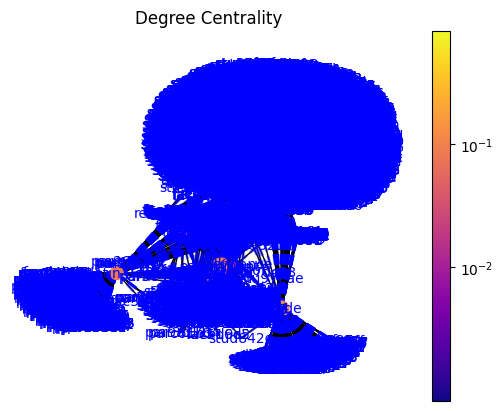

In [19]:
#* Draw the graph with node sizes proportional to their degree centrality.
draw(G, degree, 'Degree Centrality')

In [20]:
#* Sort the nodes by their degree centrality and print the sorted list.
x = degree
sorted_x = sorted(x.items(), key=lambda kv: kv[1], reverse=True)
for item in sorted_x:
    print(item)

('enroll', 0.8150572831423896)
('assignment', 0.11199438859013328)
('grade', 0.10989010989010989)
('Bulletin Board', 0.08463876548982932)
('commented', 0.04676174888940846)
('register', 0.04559270516717325)
('like', 0.03460369417816227)
(nan, 0.027589431844750992)
('happy', 0.02034136076689268)
('attendance', 0.014729950900163666)
('angry', 0.004208557400046762)
('faccdfbd', 0.0025718961889174656)
('surprise', 0.0025718961889174656)
('collaborate', 0.0025718961889174656)
('fac22eba', 0.002338087444470423)
('fac1ed29', 0.002104278700023381)
('fac8a4fe', 0.002104278700023381)
('fac9bb58', 0.002104278700023381)
('face5646', 0.002104278700023381)
('fac834bd', 0.002104278700023381)
('faccf869', 0.002104278700023381)
('fac4546c', 0.0018704699555763386)
('facdbf59', 0.0018704699555763386)
('facf3e98', 0.0018704699555763386)
('fac978f1', 0.0018704699555763386)
('fac98322', 0.0016366612111292963)
('faccf734', 0.0016366612111292963)
('fac30e56', 0.0016366612111292963)
('facd1fca', 0.001636661211

In [21]:
#* Write the degree centrality to a file and render it.
# writeandrender(
#     filename, {
#         "measure": degree,
#         "name": "Degree Centrality",
#         "prefix": "degree",
#         "overwrite": True
# })

## Eigenvector Centrality 

In [35]:
#* Calculate the eigenvector centrality of the graph.
eigenvector = nx.eigenvector_centrality(G, max_iter=1000)

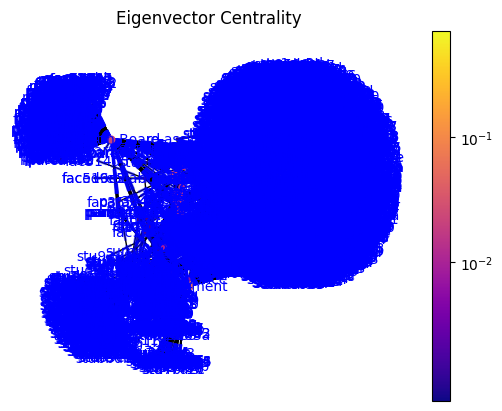

In [36]:
#* Draw the graph with node sizes proportional to their eigenvector centrality.
draw(G, eigenvector, 'Eigenvector Centrality')

In [37]:
#* Sort the nodes by their betweenness centrality and print the sorted list.
x = eigenvector
sorted_x = sorted(x.items(), key=lambda kv: kv[1], reverse=True)
for item in sorted_x:
    print(item)

('enroll', 0.7017534013673403)
('assignment', 0.0557761042411282)
('register', 0.041662921550807294)
('grade', 0.029139409459768083)
('Bulletin Board', 0.02264059339302419)
(nan, 0.022280888200483136)
('like', 0.017762499615332245)
('commented', 0.017575106443865115)
('faccdfbd', 0.015154008713060375)
('fac22eba', 0.014999841730937493)
('face5646', 0.01499031182447433)
('fac834bd', 0.014981584905160484)
('fac8a4fe', 0.0149796737776395)
('faccf869', 0.01497146361939721)
('facf3e98', 0.014289615026242736)
('faccf734', 0.014262265938767721)
('fac4546c', 0.014235512400666835)
('fac98322', 0.014219363868377285)
('fac30e56', 0.014219363868377285)
('stu29fd4', 0.014207418715602793)
('stua2227', 0.014207418715602793)
('stua41a0', 0.014046589404517204)
('stu39df2', 0.014046589404517204)
('stu28fa6', 0.014046589404517204)
('stu1eaa4', 0.014046589404517204)
('stu62aa0', 0.01390844500709258)
('stu72b4f', 0.01390844500709258)
('stu69321', 0.013835796952186976)
('stu13a64', 0.013766918380732086)
('f

In [38]:
#* Write the eigenvector centrality to a file.
# with open(filename + "eigen.txt", 'a') as f:
#     f.write(str(eigenvector))

In [39]:
#* Write the eigenvector centrality to a file and render it.
# writeandrender(filename,
#     {
#         "measure":eigenvector,
#         "name": "Eigenvector Centrality",
#         "prefix":"eigen",
#         "overwrite": True
#     }
# )

## Betweenness Centrality 

In [40]:
#* Calculate the betweenness centrality of the graph.
betweenness = nx.betweenness_centrality(G)

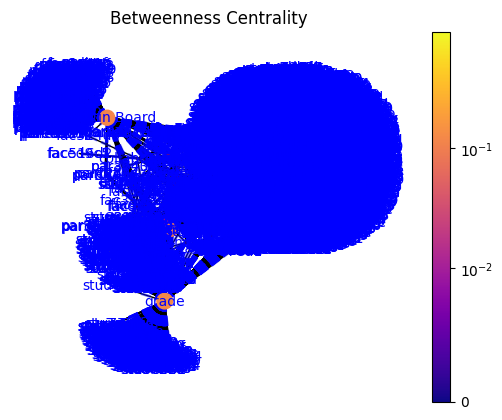

In [41]:
#* Draw the graph with node sizes proportional to their betweenness centrality.
draw(G, betweenness, 'Betweenness Centrality')

In [42]:
#* Sort the nodes by their betweenness centrality and print the sorted list.
x = nx.betweenness_centrality(G)
sorted_x = sorted(x.items(), key=lambda kv: kv[1], reverse=True)
for item in sorted_x:
    print(item)

('enroll', 0.93925511941912)
('grade', 0.12513389464548327)
('Bulletin Board', 0.11624954500777383)
('assignment', 0.08295264460249722)
('commented', 0.014467413062267828)
('like', 0.00812423247836786)
('register', 0.005190932635870532)
(nan, 0.003746198532186781)
('happy', 0.003511436154987179)
('fac4546c', 0.003000407639848396)
('fac98322', 0.0028679329300261677)
('fac30e56', 0.0028679329300261677)
('fac22eba', 0.0026413602500426933)
('fac193cf', 0.0026015696005529465)
('face21a8', 0.0026015696005529465)
('faccdfbd', 0.0025875292773687225)
('facb81cb', 0.0025204748686983)
('facdeb9e', 0.0025204748686983)
('facc4a51', 0.0025204748686983)
('faccf869', 0.0024326853555041955)
('fac834bd', 0.002314554489387016)
('facf3e98', 0.0023072536486285215)
('fac8a4fe', 0.0022998358676833072)
('face5646', 0.002272288189322771)
('faccf734', 0.0020970394591396033)
('stu69321', 0.0014826672547005207)
('fac80093', 0.001402152473554674)
('fac978f1', 0.0013292223796016764)
('fac1ed29', 0.00131023815967696

In [43]:
#* Write the betweenness centrality to a file and render it.
# writeandrender(
#   filename, {
#       "measure": betweenness,
#       "name": 'Betweenness Centrality',
#       "prefix": "bet",
#       "overwrite": True
#   }
# )